<h1>
Importing Necessary modules
</h1>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import confusion_matrix

<h2>Reading Data</h2>

In [47]:
df=pd.read_csv(r"train.csv")
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


### Checking the number of unique values

In [48]:
for i in df.columns:
    n=df[i].nunique()
    if(n <10):
        print(i,n)


Term 3
Grade 7
Employment Duration 3
Verification Status 3
Payment Plan 1
Delinquency - two years 9
Inquires - six months 6
Public Record 5
Initial List Status 2
Collection 12 months Medical 2
Application Type 2
Accounts Delinquent 1
Loan Status 2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

<h3>Dropping down the unnecessary columns<br></h3>
Understood by the column properties and the number of uniques in the column

In [50]:
df.drop(["ID","Batch Enrolled","Accounts Delinquent","Payment Plan","Term"],axis=1,inplace=True)
df['Initial List Status'].head()

0    w
1    f
2    w
3    w
4    w
Name: Initial List Status, dtype: object

<h3>Separating Categorical variables</h3><br>

In [51]:
categorical=["Grade","Sub Grade","Employment Duration","Verification Status","Loan Title","Initial List Status","Application Type"]

In [52]:
import category_encoders as ce

<h3>Using Binary Encoder</h3>

In [53]:
encoder = ce.BinaryEncoder(cols=categorical)
encoded_data = encoder.fit_transform(df)
encoded_data['Initial List Status_0'].head()

c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_c

c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is

0    0
1    1
2    0
3    0
4    0
Name: Initial List Status_0, dtype: int64

In [54]:
encoded_data.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Grade_0,Grade_1,Grade_2,Sub Grade_0,Sub Grade_1,Sub Grade_2,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type_0,Application Type_1,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,11.846258,0.406000,0.534159,0.442865,0.045684,0.324504,0.502453,...,59.691578,1.125141,0.021301,0.001823,0.998177,71.163260,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.718629,0.491088,0.498835,0.496729,0.208801,0.468193,0.499998,...,357.026346,3.489885,0.144385,0.042661,0.042661,43.315845,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,5.320006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000036,0.000000,0.000000,0.000000,0.000000,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,9.297147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.629818,0.476259,0.000000,0.000000,1.000000,35.000000,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,11.377696,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.344524,0.780141,0.000000,0.000000,1.000000,68.000000,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,14.193533,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,5.453727,1.070566,0.000000,0.000000,1.000000,105.000000,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,27.182348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4354.467419,166.833000,1.000000,1.000000,1.000000,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000


<h3>Box Plotting to identify outliers</h3>

c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Funded Amount Investor'>

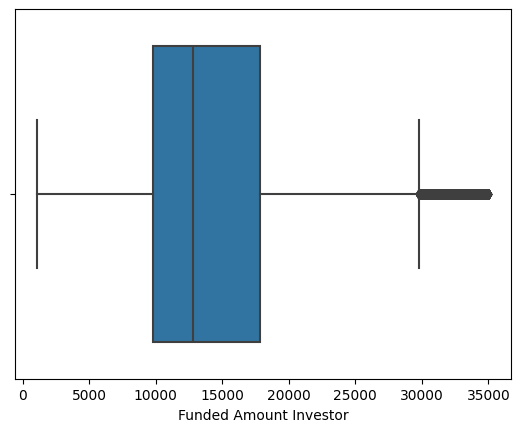

In [55]:
import seaborn as sns
sns.boxplot(data=encoded_data, x='Funded Amount Investor')

In [56]:
plt.figure(figsize=(100,100))
sns.boxplot(data=encoded_data,orient='v')
plt.show()

c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yogit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

In [57]:
for i in encoded_data.columns:
    if(i!="Loan Status"):
        Q1=encoded_data[i].quantile(0.25)
        Q3=encoded_data[i].quantile(0.75)
        IQR=Q3-Q1
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR

        new_df=encoded_data[(encoded_data[i] >= lower_threshold) & (encoded_data[i] <= upper_threshold)]

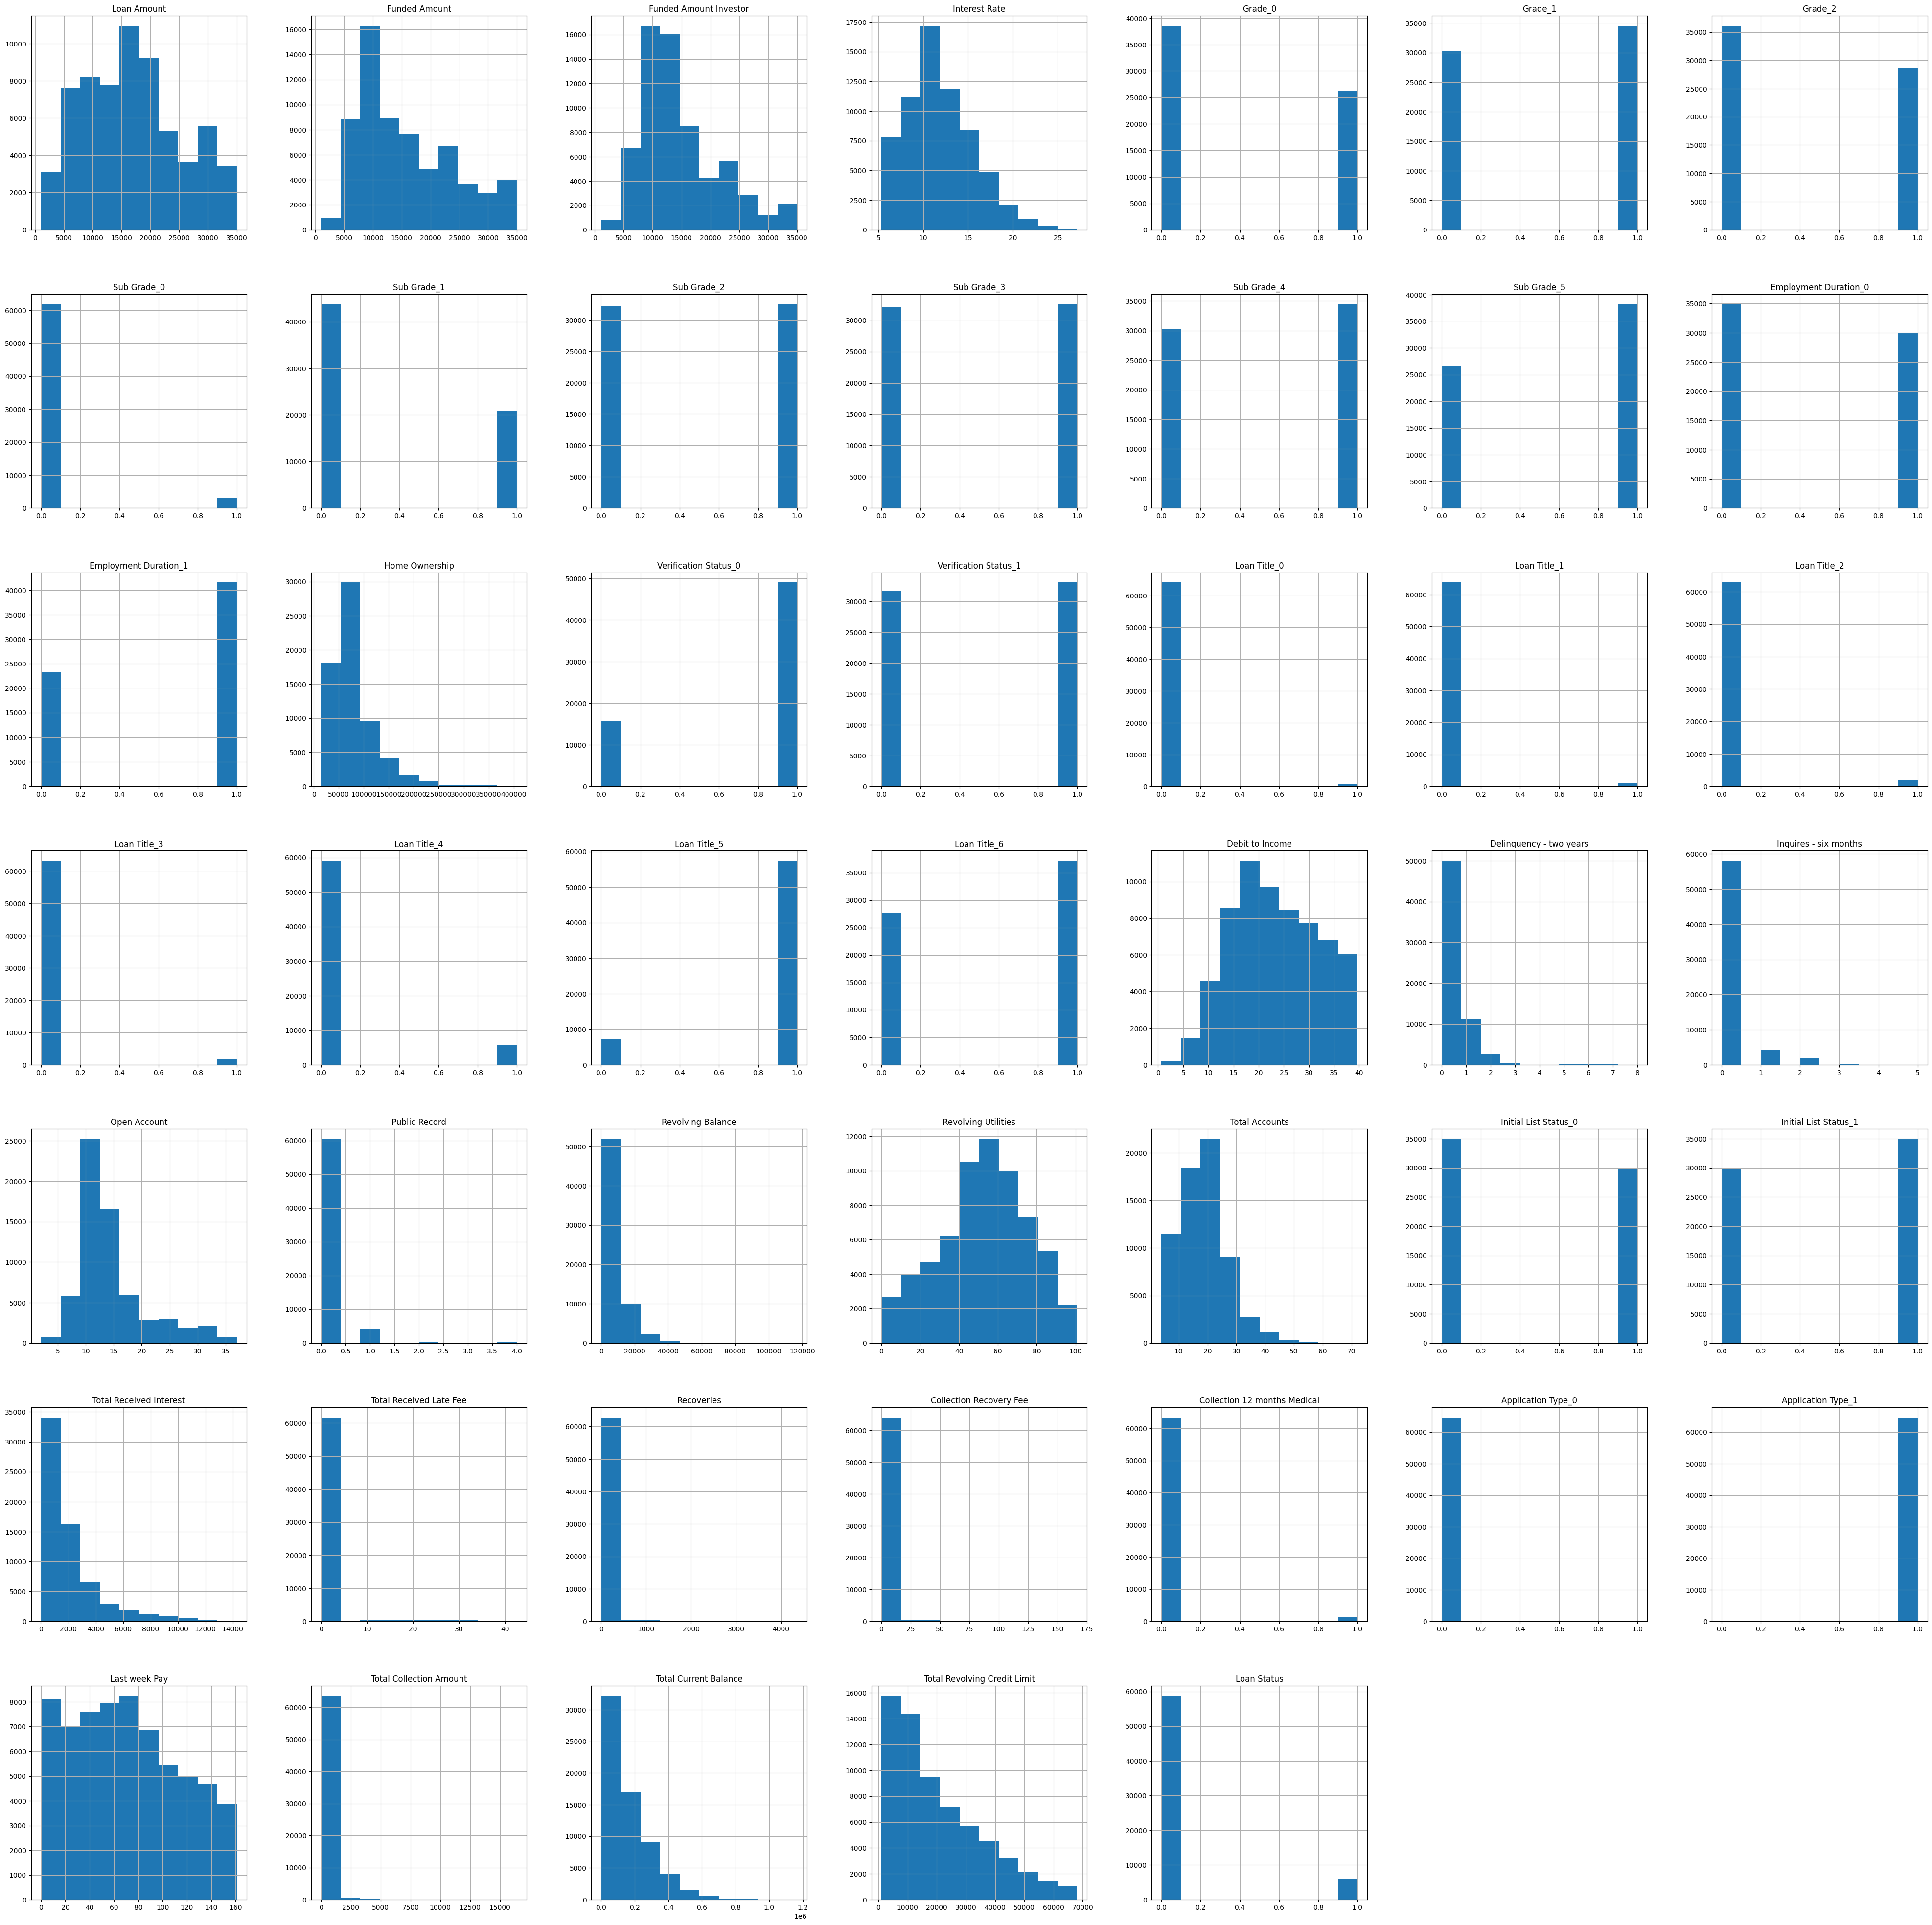

In [58]:
new_df.hist(figsize=(50,50))
plt.show()

## Dropping Columns identified from the histogram

In [59]:
new_df=new_df.drop(["Loan Title_0","Loan Title_1","Loan Title_2","Loan Title_3","Loan Title_4","Loan Title_5","Loan Title_6","Sub Grade_0","Inquires - six months","Public Record","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Application Type_0","Application Type_1","Total Collection Amount","Delinquency - two years","Revolving Balance","Total Received Interest","Total Current Balance"],axis=1)

In [60]:
X=new_df.drop("Loan Status",axis=1)
y=new_df["Loan Status"]

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64774 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   64774 non-null  int64  
 1   Funded Amount                 64774 non-null  int64  
 2   Funded Amount Investor        64774 non-null  float64
 3   Interest Rate                 64774 non-null  float64
 4   Grade_0                       64774 non-null  int64  
 5   Grade_1                       64774 non-null  int64  
 6   Grade_2                       64774 non-null  int64  
 7   Sub Grade_1                   64774 non-null  int64  
 8   Sub Grade_2                   64774 non-null  int64  
 9   Sub Grade_3                   64774 non-null  int64  
 10  Sub Grade_4                   64774 non-null  int64  
 11  Sub Grade_5                   64774 non-null  int64  
 12  Employment Duration_0         64774 non-null  int64  
 13  Employ

<h3>Undersampling the data</h3>

In [62]:
# from imblearn.under_sampling import RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)
# X_resampled=X
# y_resampled=y

# score:51.23

In [63]:
loan_title=df["Loan Title"].unique()


In [64]:
df["Initial List Status"].unique()

array(['w', 'f'], dtype=object)

In [65]:
print(new_df.columns)

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Grade_0', 'Grade_1', 'Grade_2', 'Sub Grade_1',
       'Sub Grade_2', 'Sub Grade_3', 'Sub Grade_4', 'Sub Grade_5',
       'Employment Duration_0', 'Employment Duration_1', 'Home Ownership',
       'Verification Status_0', 'Verification Status_1', 'Debit to Income',
       'Open Account', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status_0', 'Initial List Status_1', 'Last week Pay',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')


Loan Amount - loan amount applied
float

Funded Amount- loan amount funder
float

Funded Amount Investor - loan amount approved by the investors
float

Interest rate - interest rate (%) on loan
float

Grade (0,1,2) - Grade by the bank
A,B,C,D,E,F,G

Subgrade (1,2,3,4,5) - sub-grade by the bank
A1-A5, B1-B5, C1-C5, D1-D5, E1-E5, F1-F5, G1-G5

Employment duration (0,1) - duration    
(Mortgage/Rent/Own)

Home ownership - Owner ship of home
float

Verification status (0,1) - Income verification by the bank
Not Verified, Source Verified, Verified


Debit to income - ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage
float


Open Account - number of open credit line in representative's credit line
int

Revolving Utilities - amount of credit a representative is using relative to revolving_balance
float

Total Accounts - total number of credit lines available in representatives credit line
int

Initial List Status (0,1) - unique listing status of the loan - W(Waiting), F(Forwarded)
w,f

Last week Pay - indicates how long (in weeks) a representative has paid EMI after batch enrolled
int

Total Revolving Credit Limit - total revolving credit limit
int

<h3>Oversampling the data</h3>

In [66]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

<h3>Splitting the data into Test Data and Train Data</h3>

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42,stratify=y_resampled)

<h1>Logistic Regression<br></h1>

In [69]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [70]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [71]:
logreg.score(X_test,y_test)

0.4985707479752263

In [72]:
from collections import Counter
predicted=logreg.predict(X_test)
Counter(predicted)

Counter({1: 14988, 0: 14398})

<h2>Confusion Matrix<br></h2>


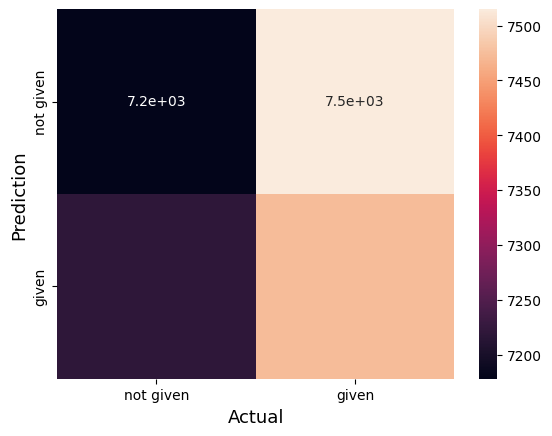

In [73]:
conf=confusion_matrix(y_test,predicted)
sns.heatmap(conf,annot=True,xticklabels=['not given','given'],yticklabels=['not given','given'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

<h1>DecisionTreeClassifier<br></h1>

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [75]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
dtc.score(X_test,y_test)

0.9392567889471177

In [77]:
predicted=dtc.predict(X_test)
Counter(predicted)

Counter({1: 16460, 0: 12926})

<h2>Confusion Matrix<br></h2>


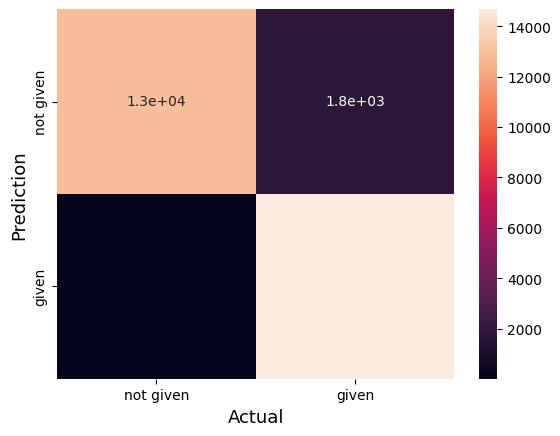

In [78]:
conf=confusion_matrix(y_test,predicted)
sns.heatmap(conf,annot=True,xticklabels=['not given','given'],yticklabels=['not given','given'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

<h1>RandomForestClassifier<br></h1>

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
rfc.score(X_test,y_test)

0.9993194037977268

In [82]:
predicted=rfc.predict(X_test)
Counter(predicted)

Counter({0: 14713, 1: 14673})

<h2>Confusion Matrix<br></h2>


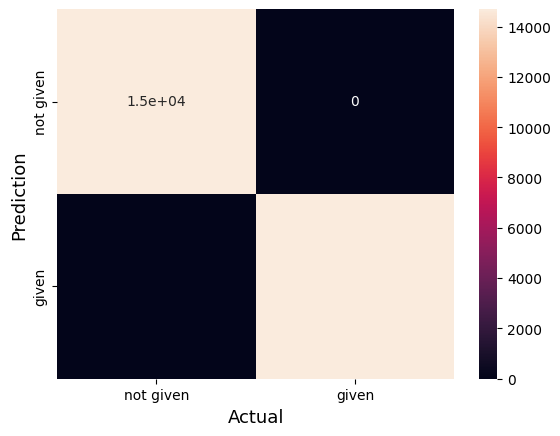

In [83]:
conf=confusion_matrix(y_test,predicted)
sns.heatmap(conf,annot=True,xticklabels=['not given','given'],yticklabels=['not given','given'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

<h1>KNeighbors<br></h1>

In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (k)
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
model.score(X_test,y_test)


0.8392091472129586

In [85]:
predicted=model.predict(X_test)
Counter(predicted)

Counter({1: 18996, 0: 10390})

<h2>Confusion Matrix<br></h2>


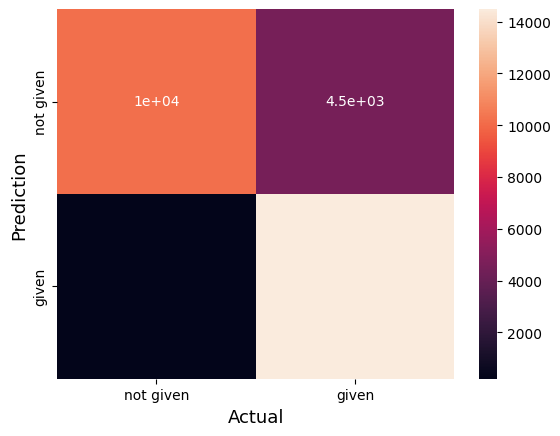

In [86]:
conf=confusion_matrix(y_test,predicted)
sns.heatmap(conf,annot=True,xticklabels=['not given','given'],yticklabels=['not given','given'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

In [87]:
import pickle
pickle.dump(rfc,open("rfc_model.pkl","wb"))

In [88]:
pickle.dump(logreg,open("log_model.pkl",'wb'))

In [89]:
model=pickle.load(open('rfc_model.pkl','rb'))
model.score(X_test,y_test)

0.9993194037977268

In [90]:
inp=[]